In [7]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')


# y = 1 + 2x

np.random.seed(42)
X = np.random.rand(100, 1)
y = 1 + 2 * X + .1 * np.random.randn(100, 1)

# Shuffles the indices
idx = np.arange(100)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:80]

# Uses the ramaining indices for validation
val_idx = idx[80:]

# Generates train and validation sets
X_train, y_train = X[train_idx], y[train_idx]
X_val, y_val = X[val_idx], y[val_idx]

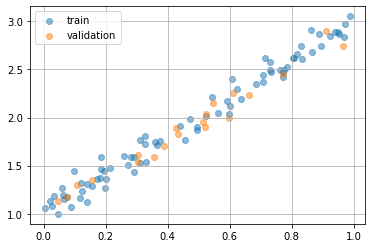

In [8]:
# Plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(X_train, y_train, color = 'C0', label = 'train', alpha = 0.5)
ax.scatter(X_val, y_val, color = 'C1', label = 'validation', alpha = 0.5)
ax.legend()
ax.grid(True)
fig.show()

### Linear Regression with Numpy

In [10]:
np.random.seed(42)
a = np.random.randn(1)
b = np.random.randn(1)

print(a, b)

# Sets learning rate
lr = 1e-1

# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    
    # Computes our model's predicted output
    yhat = a + b * X_train
    
    # Computes our model? That's the error!
    error = (y_train - yhat)
    # It is a regression, so it computes mean squared error(MSE)
    loss = (error ** 2).mean()
    
    # Computes gradients for both "a" and "b" parameters
    a_grad = -2 * error.mean()
    b_grad = -2 * (X_train * error).mean()
    
    # Updates parameters using gradients and the learning rate
    a = a - lr * a_grad
    b = b - lr * b_grad
    
print(a, b)

from sklearn.linear_model import LinearRegression
linr = LinearRegression()
linr.fit(X_train, y_train)
print(linr.intercept_, linr.coef_[0])

[0.49671415] [-0.1382643]
[1.02354094] [1.96896411]
[1.02354075] [1.96896447]


### Loading Data, Devices, and CUDA

In [11]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'

X_train_tensor = torch.from_numpy(X_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).float().to(device)

### Creating Parameters

#### Bad Example

In [12]:
a = torch.randn(1, requires_grad = True, dtype = torch.float).to(device)
b = torch.randn(1, requires_grad = True, dtype = torch.float).to(device)
print(a, b)

tensor([-0.9079], requires_grad=True) tensor([-0.5149], requires_grad=True)


#### Working Example

In [13]:
a = torch.randn(1, dtype = torch.float).to(device)
b = torch.randn(1, dtype = torch.float).to(device)

a.requires_grad_()
b.requires_grad_()
print(a, b)

tensor([1.1507], requires_grad=True) tensor([0.5742], requires_grad=True)


#### Good Example

In [15]:
a = torch.randn(1, requires_grad = True, dtype = torch.float, device = device)
b = torch.randn(1, requires_grad = True, dtype = torch.float, device = device)
print(a, b)

tensor([-1.3140], requires_grad=True) tensor([0.4153], requires_grad=True)
